# Problem 1.3

(c) Sketch the graph of $\rho(x)$

$$
    \rho(x) = \sqrt{\frac{\lambda}{\pi}} e^{-\lambda(x-a)^{2}}
$$

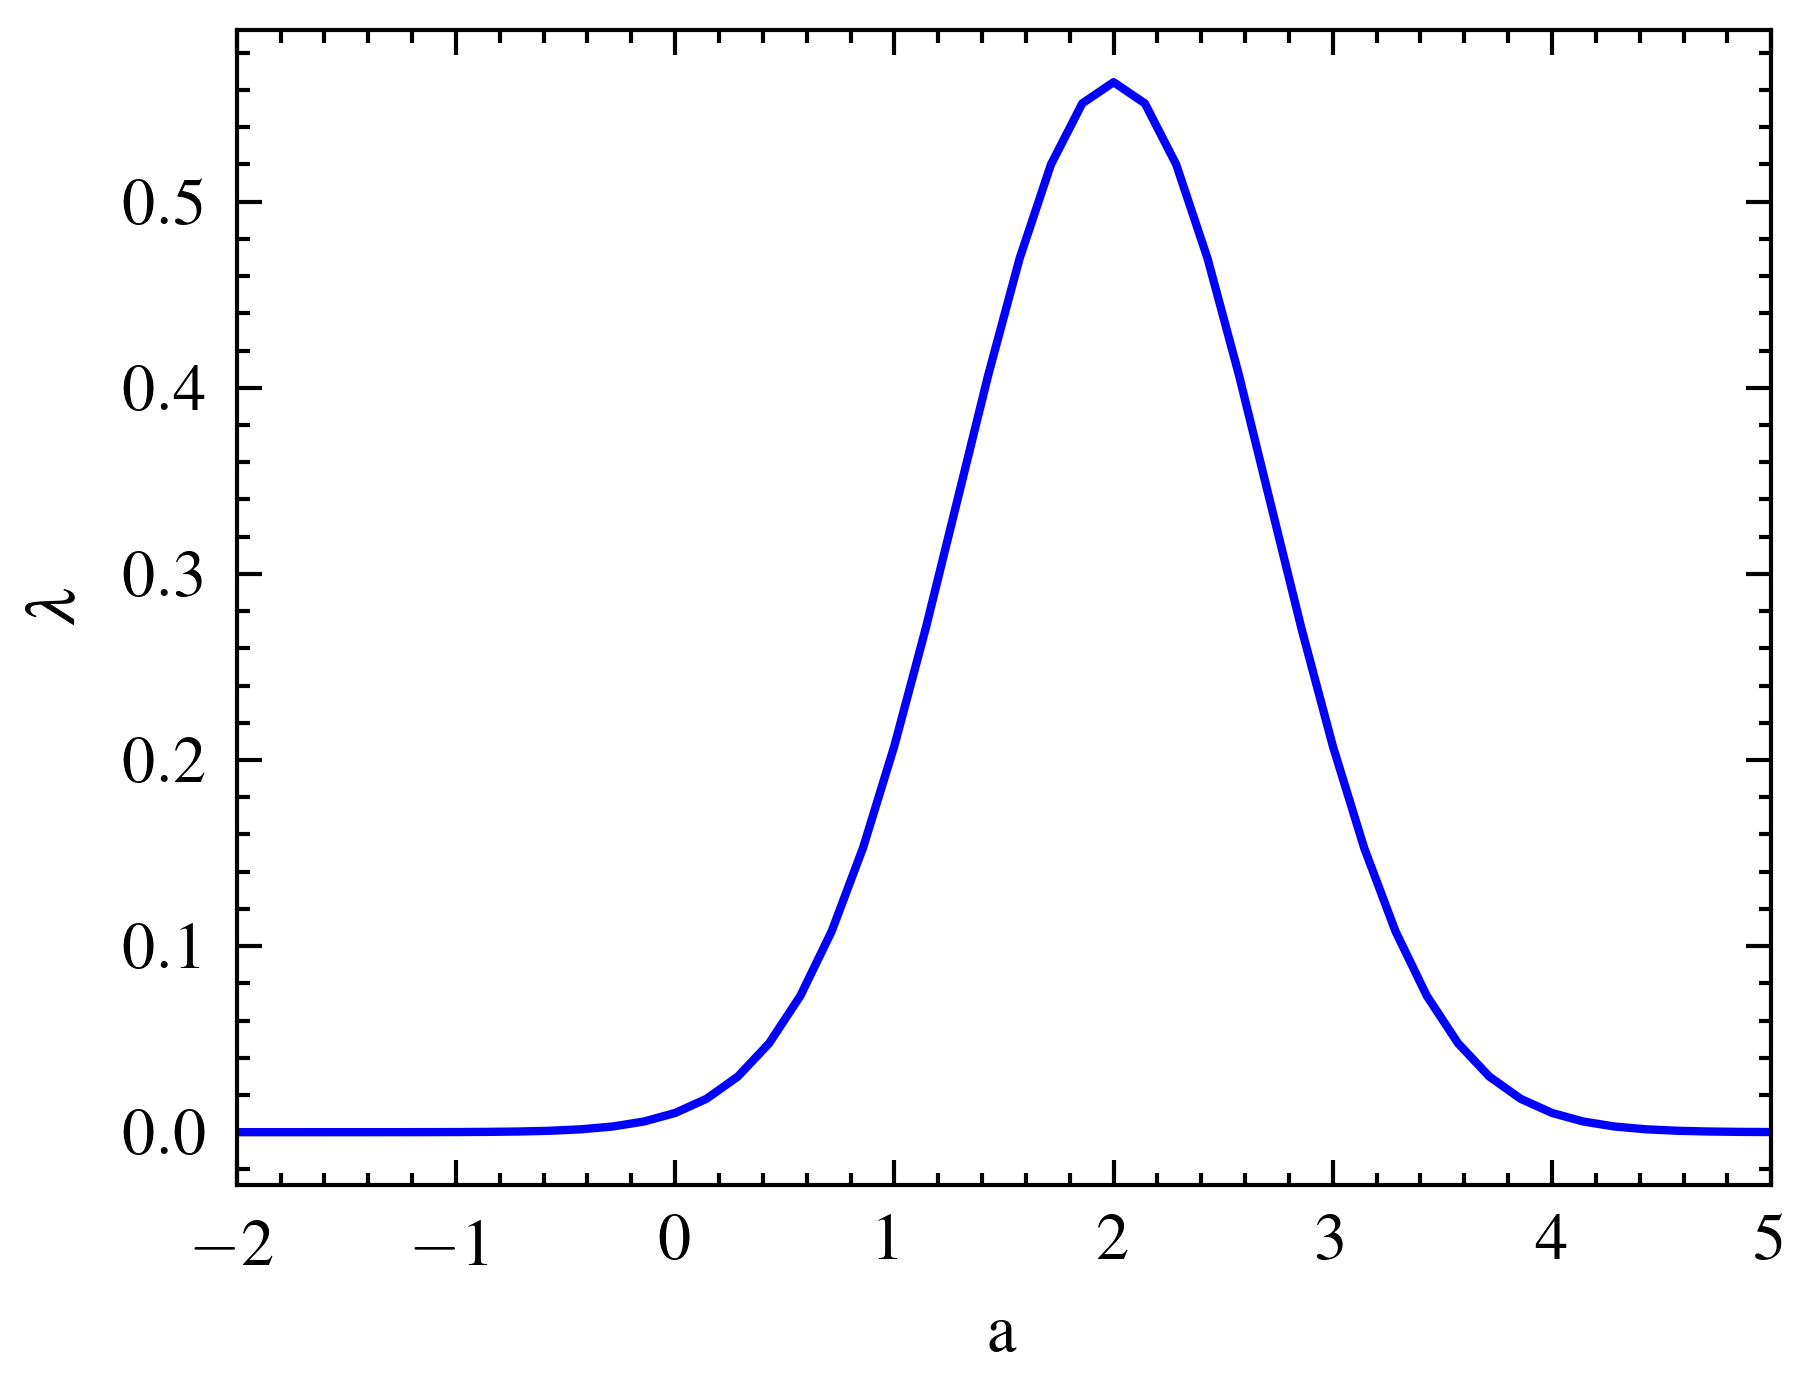

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','ieee'])


def prob_dens(x,l,a):
    return np.sqrt(l/np.pi)*np.exp(-l*(x-a)**2)

num = np.linspace(-2,5)
l = 1
a = 2
min_y = min(prob_dens(num,l,a)) 

#Plot
fig, ax = plt.subplots()
ax.plot(num,prob_dens(num,l,a), color='blue')
ax.set_xlabel('a')
ax.set_ylabel(r'$\lambda$')
ax.set_xlim(-2,5)
plt.show()



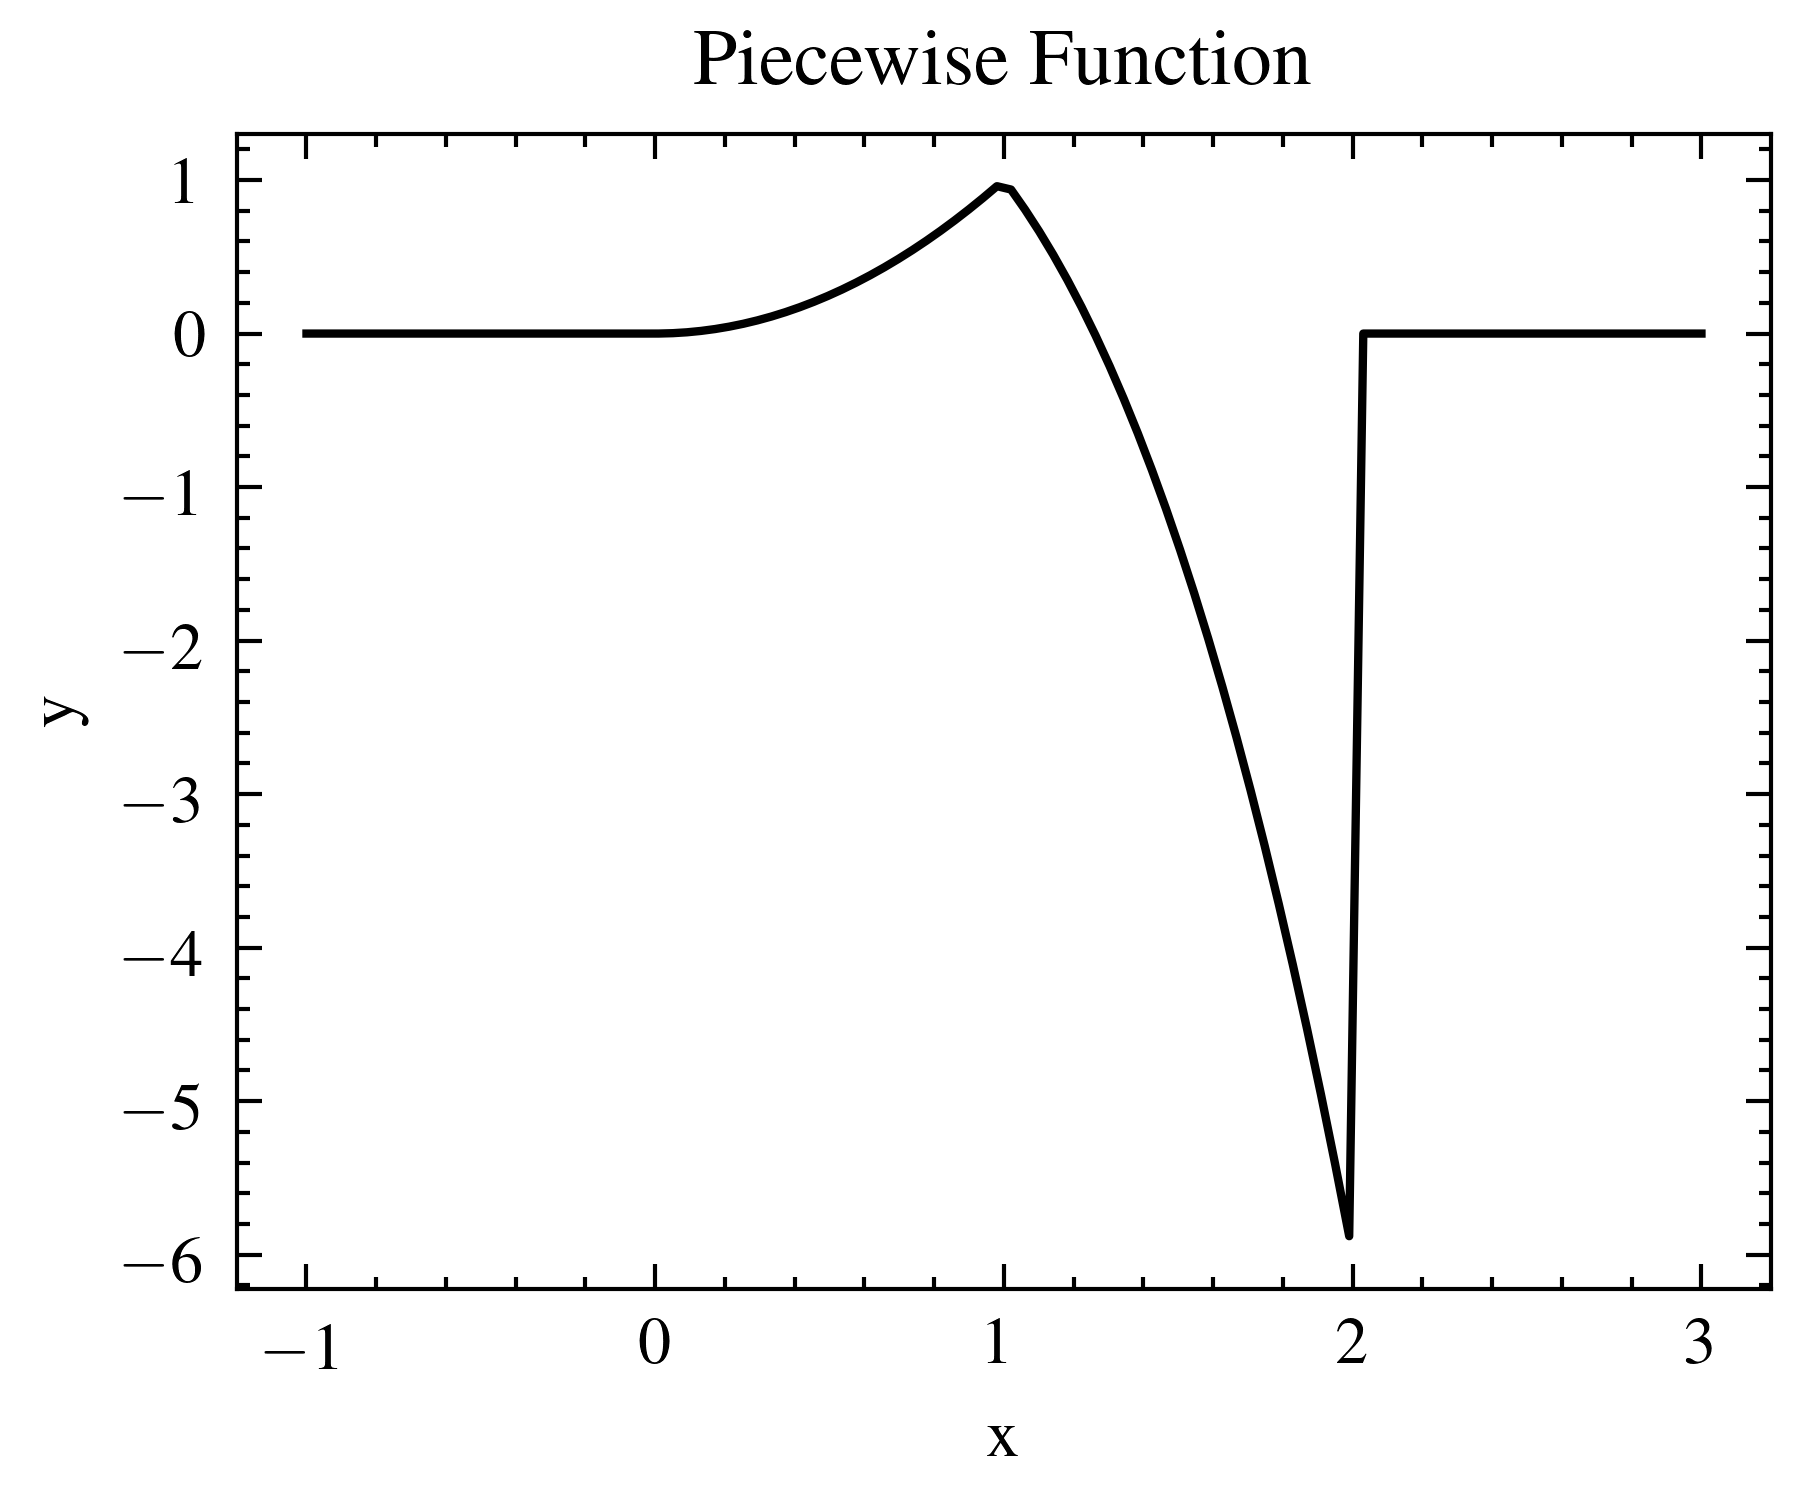

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','ieee'])

def piecewise_function(x):
  """
  Defines a piecewise function with different values in different intervals.

  Args:
    x: The input value.

  Returns:
    The value of the function at x.
  """
  if x < 0:
    return 0
  elif x < 1:
    return x**2
  elif x < 2:
    return 2 - x**3
  else:
    return 0

# Generate x values
x = np.linspace(-1, 3, 100)

# Calculate corresponding y values
y = [piecewise_function(val) for val in x]



# Create the plot
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Piecewise Function")
plt.show()